In [25]:
import os

import numpy as np
import zarr
import tifffile
import micro_sam
import  matplotlib.pyplot as plt

In [3]:

from micro_sam.sam_annotator import image_folder_annotator
from micro_sam.sample_data import fetch_image_series_example_data
from micro_sam.util import get_cache_directory

DATA_CACHE = os.path.join(get_cache_directory(), "for yuval")
#EMBEDDING_CACHE = os.path.join(get_cache_directory(), "embeddings")
EMBEDDING_CACHE = r'C:\Users\amityu\ARIEL_DATA'
os.makedirs(EMBEDDING_CACHE, exist_ok=True)


def series_annotation(use_finetuned_model):
    """Annotate a series of images. Example runs for three different images.
    """

    if use_finetuned_model:
        embedding_path = os.path.join(EMBEDDING_CACHE, "series-embeddings-vit_b_lm")
        model_type = "vit_b_lm"
    else:
        embedding_path = os.path.join(EMBEDDING_CACHE, "2d_embedding")
        model_type = "vit_h"

    #example_data = fetch_image_series_example_data(DATA_CACHE)
    example_data =os.path.join(EMBEDDING_CACHE, '2d_images')
    image_folder_annotator(
        example_data, "./series-segmentation-result",
        pattern="*.tif",
        embedding_path=embedding_path,
        model_type=model_type,
        precompute_amg_state=False,
    )


def main():
    # Whether to use the fine-tuned SAM model.
    use_finetuned_model = False
    series_annotation(use_finetuned_model)


# The corresponding CLI call for track_ctc_data:
# (replace with cache directory on your machine)
# $ micro_sam.image_series_annotator -i /home/pape/.cache/micro_sam/sample_data/image-series.zip.unzip/series/ -e /home/pape/.cache/micro_sam/embeddings/series-embeddings/ -o segmentation_results
if __name__ == "__main__":
    main()


Precompute state for files: 100%|██████████| 1/1 [00:05<00:00,  5.91s/it]


In [33]:
from micro_sam.bioimageio import predictor_adaptor as predictor
from micro_sam.instance_segmentation import AutomaticMaskGenerator 
p = predictor.PredictorAdaptor('vit_h')

In [35]:
img = tifffile.imread(os.path.join(EMBEDDING_CACHE, '2d_images','c10.tif'))


In [36]:
amg = AutomaticMaskGenerator(p.sam)
%time amg.initialize(img)  # Initialize the masks, this takes care of all expensive computations.
masks = amg.generate()  # Generate the masks. This is fast and enables testing parameters

CPU times: total: 23min 47s
Wall time: 2min 32s


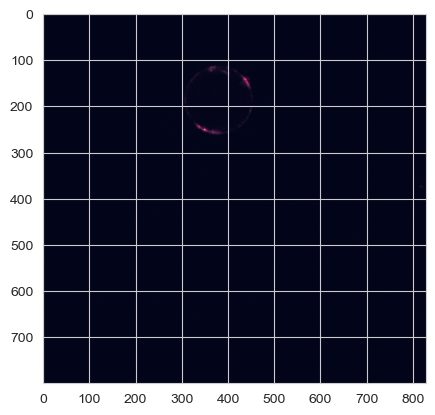

In [37]:
plt.imshow(img)

In [20]:
mask = micro_sam.inference.batched_inference(p.sam,img,1, np.array([0,0,512,512]), embedding_path =os.path.join(EMBEDDING_CACHE, "series-embeddings-vit_b_lm" ))

AttributeError: 'SamPredictor' object has no attribute 'model_type'

In [27]:
segmentations = []
embed_dir_path = os.path.join(EMBEDDING_CACHE, 'series-embeddings')
encoding_files = os.listdir(embed_dir_path)
for file in encoding_files:
    segmentations.append(zarr.open(os.path.join(embed_dir_path, file), mode='r'))#['encodings'][:])
'''for encoding in encodings:
    with torch.no_grad():
        segmentation = model.decode(encoding)  # Replace with the actual decoding function
        segmentations.append(segmentation)'''


'for encoding in encodings:\n    with torch.no_grad():\n        segmentation = model.decode(encoding)  # Replace with the actual decoding function\n        segmentations.append(segmentation)'

In [16]:
#print(os.path.join(EMBEDDING_CACHE,ile))
os.listdir(os.path.join(EMBEDDING_CACHE, 'series-embeddings'))

['20120913 exp3 x2_5 stream00716.zarr',
 '20120913 exp3 x2_5 stream00717.zarr',
 '20120913 exp3 x2_5 stream00718.zarr',
 '20120913 exp3 x2_5 stream00719.zarr',
 '20120913 exp3 x2_5 stream00720.zarr']

In [32]:
t = 0
embedding_path = os.path.join(embed_dir_path,encoding_files[t])
model_type = "vit_h"

annotator_2d(image, embedding_path, model_type=model_type)